In [1]:
from load_data import load_df, file_names, names_column, folder
import os
import hvplot.pandas
import pandas as pd
import holoviews as hv
from bokeh.io import export_svgs
from copy import deepcopy
from bokeh.io import output_notebook, show
from bokeh.models.tickers import FixedTicker
from IPython import display

data_cases_path = 'data_cases'

hv.extension('bokeh')
renderer = hv.renderer('bokeh')

OPTS_PLOT1 = {
    'legend_position': 'right',
    'width': 500,
    'height': 300,
    'xlabel': 'Time [Days]',
    'ylabel': 'CUM OIL [MSTB]',
    'title': "Cumulative oil",
    'show_grid': True,
    'tools': ['hover'],
    'fontsize': {
        'labels': 14,
        'legend': 12,
        'xticks': 10, 
        'yticks': 10
    }
}

In [2]:
def export_svg(obj, filename):
    hv.extension('matplotlib')
    hv.save(obj, filename, fmt='svg')
    obj
    hv.extension('bokeh')

In [3]:
def load_all_data():
    dfs = []
    for name in file_names:
        df = load_df(name)
        dfs.append(df)

    dfs = pd.concat(dfs, ignore_index=True)
    return dfs

In [4]:
def get_df_resp(df, column):
    columns = ['time_days', column, 'case']
    df_resp = df[columns]
    return df_resp.copy()

def get_curves(df, cases, column, legend_dict: dict):
    curves = [hv.Curve(
        (
            df['time_days'][df['case']==i].values, 
            df[column][df['case']==i].values
        ),
        label=legend_dict[i]
    ) for i in cases]
    
    my_curves = curves[0]
    for i in range(1, len(curves)):
        my_curves = my_curves * curves[i]
    
    return my_curves
    

In [5]:
def update_legend(cases, legend_dict: dict = dict()):
    for case in cases:
        legend_dict.setdefault(case, case)
    
    return legend_dict

In [6]:
def plot_cum_oil(df, cases, legend_dict: dict=dict()):
    column = 'cum_oil_Mstb'
    legend_dict = update_legend(cases, legend_dict)
    df_resp = get_df_resp(df, column)
    my_curves = get_curves(df_resp, cases, column, legend_dict)
    my_opts = deepcopy(OPTS_PLOT1)
    my_opts.update({
        'ylabel': 'CUM OIL [MSTB]',
        'title': "Cumulative oil"
    })
    my_curves.opts(
        **my_opts
    )
    return my_curves

In [7]:
def plot_wor(df, cases, legend_dict: dict=dict()):
    column = 'wor_stb_stb'
    legend_dict = update_legend(cases, legend_dict)
    df_resp = get_df_resp(df, column)
    my_curves = get_curves(df_resp, cases, column, legend_dict)
    my_opts = deepcopy(OPTS_PLOT1)
    my_opts.update({
        'ylabel': 'WOR  [STB/STB]',
        'title': "WOR",
        'ylim': (0, 6)
    })
    my_curves.opts(
        **my_opts    
    )
    return my_curves

In [8]:
def plot_pavg(df, cases, legend_dict: dict=dict()):
    column = 'pavg_psia'
    legend_dict = update_legend(cases, legend_dict)
    df_resp = get_df_resp(df, column)
    my_curves = get_curves(df_resp, cases, column, legend_dict)
    my_opts = deepcopy(OPTS_PLOT1)
    my_opts.update({
        'ylabel': 'AVG Pressure [psia]',
        'title': "AVG Pressure"
    })
    my_curves.opts(
        **my_opts    
    )
    return my_curves

In [9]:
def plot_cum_gas(df, cases, legend_dict: dict=dict()):
    column = 'cum_gas_Mmcf'
    legend_dict = update_legend(cases, legend_dict)
    df_resp = get_df_resp(df, column)
    my_curves = get_curves(df_resp, cases, column, legend_dict)
    my_opts = deepcopy(OPTS_PLOT1)
    my_opts.update({
        'ylabel': 'CUM GAS [MMcf]',
        'title': "Cumulative Gas"
    })
    my_curves.opts(
        **my_opts    
    )
    return my_curves

In [10]:
def plot_total_iterations(df, cases, legend_dict=dict()):
    df_resp = df[['iter', 'case']]
    legend_dict = update_legend(cases, legend_dict)
    data = []
    for case in cases:
        df = df_resp[df_resp['case']==case]
        iterations = df['iter'].sum()
        data.append((legend_dict[case], iterations))
    
    curve = hv.Bars(data, hv.Dimension('Case'), 'Total iterations')
    return curve

In [11]:
dfs = load_all_data()
dfs.columns

Index(['time_step', 'time_days', 'iter', 'pavg_psia', 'oil_tx_stb_p_day',
       'cum_oil_Mstb', 'wat_tx_stb_p_day', 'cum_w_Mstb', 'wor_stb_stb',
       'gas_tx_Mcf_p_day', 'cum_gas_Mmcf', 'gor_stf_stb', 'case'],
      dtype='object')

## Descrição do caso base

### Curvas de permeabilidade

### Curvas do fator volume formação

### Razão de solubilidade

### Curvas de viscosidade (água, óleo e gás)

### Disposição do poço de produção

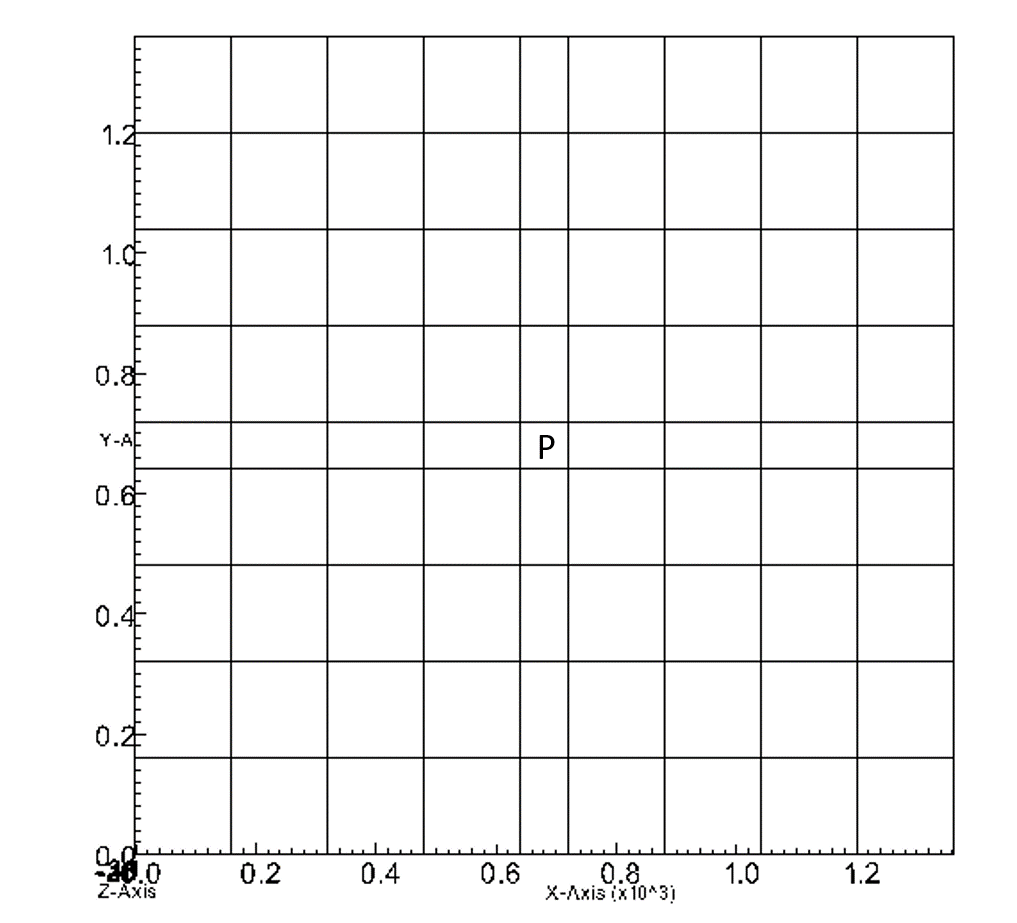

In [12]:
base_path = os.path.join(data_cases_path, 'base')
path = os.path.join(base_path, 'disposicao.png')
display.Image(path, width=400)

### Porosidade

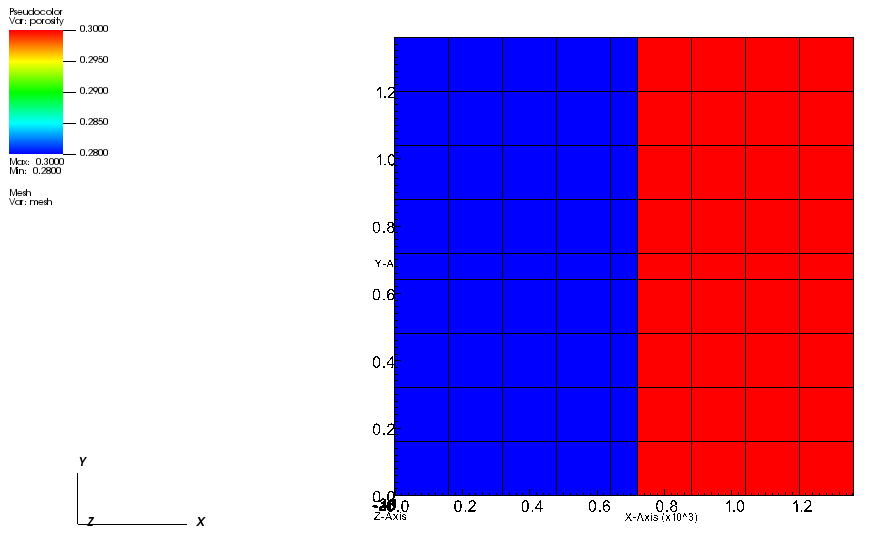

In [13]:
# 0.28 e 0.3
path = os.path.join(base_path, 'porosidade.png')
display.Image(path, width=800)

### Permeabilidade
Homogênea no valor de 100 md em todas as direções

### Campo de pressão inicial
5382 psia

### Saturação inicial

#### Água
0.12

#### Óleo
0.88

#### Gás
0

## Casos rodados

In [14]:
cases = ['base', 'base2', 'base3_c', 'base3_c3_col', 'base10', 'base12']
legend_dict1 = {
    'base': 'base (365 dias)',
    'base2': '(alt time) base',
    'base3_c': 'add 4 inj (1)',
    'base3_c3_col': '4 inj (alt prod) (1)',
    'base10': 'alt prod loc(1/4)',
    'base12': 'add inj (1/4)'
}
curves1, curves2 = plot_cum_oil(dfs, cases, legend_dict=legend_dict1), plot_wor(dfs, cases, legend_dict=legend_dict1)
curves3 = plot_pavg(dfs, cases, legend_dict=legend_dict1)
curves4 = plot_cum_gas(dfs, cases, legend_dict=legend_dict1)
(curves1 + curves2 + curves3 + curves4).opts(shared_axes=False).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Curve.Base_left_parenthesis_365_dias_right_parenthesis                                         :Curve   [x]   (y)
      .Curve.Left_parenthesis_alt_time_right_parenthesis_base                                         :Curve   [x]   (y)
      .Curve.Add_4_inj_left_parenthesis_1_right_parenthesis                                           :Curve   [x]   (y)
      .Curve.A_4_inj_left_parenthesis_alt_prod_right_parenthesis_left_parenthesis_1_right_parenthesis :Curve   [x]   (y)
      .Curve.Alt_prod_loc_left_parenthesis_1_over_4_right_parenthesis                                 :Curve   [x]   (y)
      .Curve.Add_inj_left_parenthesis_1_over_4_right_parenthesis                                      :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.Base_left_parenthesis_365_dias_right_parenthesis                                         :Curve   [x]   (y)
      .Curve.Left_parenthesis_alt_time_right_parenthesis_base                                         :Curve   [x]   (y)
      .Curve.Add_4_inj_left_parenthesis_1_right_parenthesis                                           :Curve   [x]   (y)
      .Curve.A_4_inj_left_parenthesis_alt_prod_right_parenthesis_left_parenthesis_1_right_parenthesis :Curve   [x]   (y)
      .Curve.Alt_prod_loc_left_parenthesis_1_over_4_right_parenthesis                                 :Curve   [x]   (y)
      .Curve.Add_inj_left_parenthesis_1_over_4_right_parenthesis                                      :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Base_left_parenthesis_365_dias_right_parenthesis                                         :Curve   [x]   (y)
      .Curve.Left_parenthesis_alt_time_right_parenthesis_base                                         :Curve   [x]   (y)
      .Curve.Add_4_inj_left_parenthesis_1_right_parenthesis                                           :Curve   [x]   (y)
      .Curve.A_4_inj_left_parenthesis_alt_prod_right_parenthesis_left_parenthesis_1_right_parenthesis :Curve   [x]   (y)
      .Curve.Alt_prod_loc_left_parenthesis_1_over_4_right_parenthesis                                 :Curve   [x]   (y)
      .Curve.Add_inj_left_parenthesis_1_over_4_right_parenthesis                                      :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.Base_left_parenthesis_365_dias_right_parenthesis                                         :Curve   [x]   (y)
      .Curve.Left_parenthesis_alt_time_right_parenthesis_base                                         :Curve   [x]   (y)
      .Curve.Add_4_inj_left_parenthesis_1_right_parenthesis                                           :Curve   [x]   (y)
      .Curve.A_4_inj_left_parenthesis_alt_prod_right_parenthesis_left_parenthesis_1_right_parenthesis :Curve   [x]   (y)
      .Curve.Alt_prod_loc_left_parenthesis_1_over_4_right_parenthesis                                 :Curve   [x]   (y)
      .Curve.Add_inj_left_parenthesis_1_over_4_right_parenthesis                                      :Curve   [x]   (y)

## Five spot
### Campos de pressão

#### Dia 0

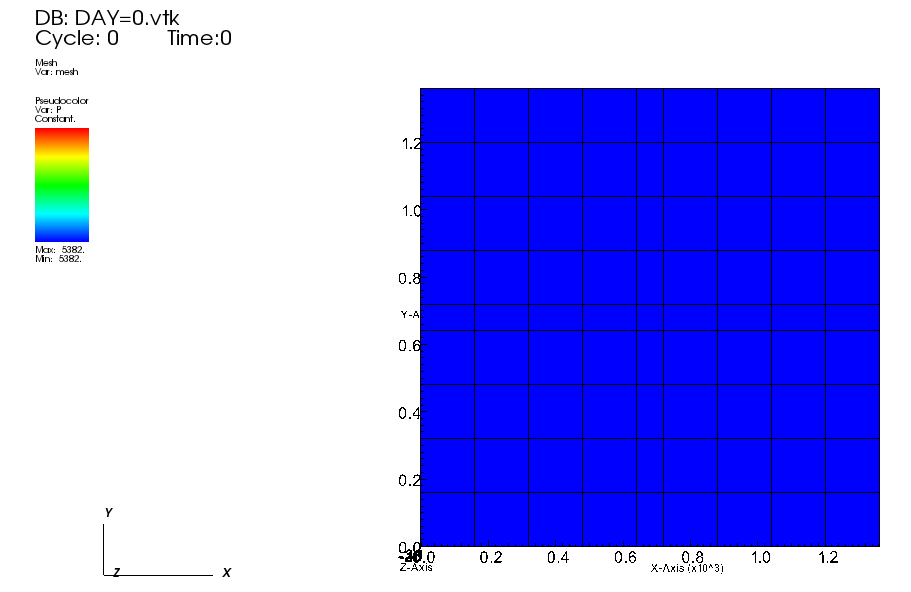

In [15]:
from IPython import display
base3_c3_col_path = os.path.join(data_cases_path, 'base3_c3_col')
path = os.path.join(base3_c3_col_path, 'P_t_0.png')
display.Image(path, width=600)

#### Dia 365

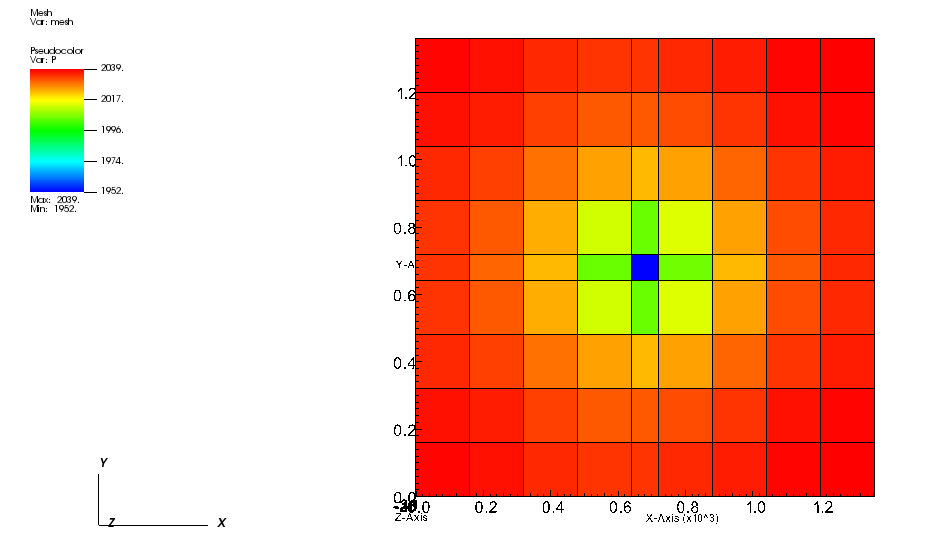

In [16]:
from IPython import display
path = os.path.join(base3_c3_col_path, 'P_t_365.png')
display.Image(path, width=600)

#### Dia 730

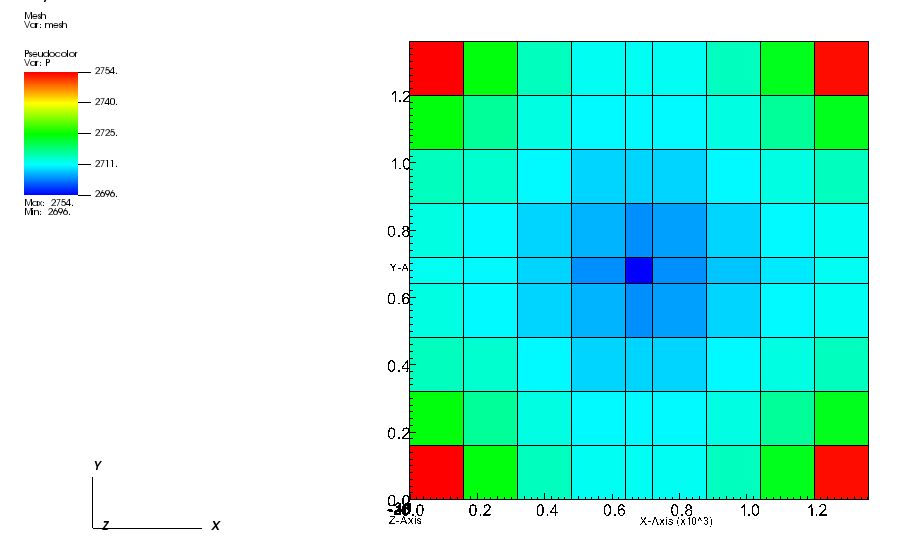

In [17]:
from IPython import display
path = os.path.join(base3_c3_col_path, 'P_t_730.png')
display.Image(path, width=600)

In [41]:
# alteracao no passo de tempo
cases = ['base12', 'base13', 'base14', 'base15', 'base16', 'base17']
legend_dict1 = {
    'base12': 'dt = 15',
    'base13': 'dt = 30',
    'base14': 'dt = 10',
    'base15': 'dt = 40',
    'base16': '(1)dt = 10 prod alterada',
    'base17': '(2)dt = 10 prod alterada'
}
curves1, curves2 = plot_cum_oil(dfs, cases, legend_dict=legend_dict1), plot_wor(dfs, cases, legend_dict=legend_dict1)
curves3 = plot_pavg(dfs, cases, legend_dict=legend_dict1)
curves4 = plot_cum_gas(dfs, cases, legend_dict=legend_dict1)
(curves1 + curves2 + curves3 + curves4).opts(
    shared_axes=False,
    width=100
    ).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Curve.Dt_equals_15                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_30                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_10                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_40                                                    :Curve   [x]   (y)
      .Curve.Left_parenthesis_1_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
      .Curve.Left_parenthesis_2_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.Dt_equals_15                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_30                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_10                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_40                                                    :Curve   [x]   (y)
      .Curve.Left_parenthesis_1_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
      .Curve.Left_parenthesis_2_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Dt_equals_15                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_30                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_10                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_40                                                    :Curve   [x]   (y)
      .Curve.Left_parenthesis_1_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
      .Curve.Left_parenthesis_2_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.Dt_equals_15                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_30                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_10                                                    :Curve   [x]   (y)
      .Curve.Dt_equals_40                                                    :Curve   [x]   (y)
      .Curve.Left_parenthesis_1_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)
      .Curve.Left_parenthesis_2_right_parenthesis_dt_equals_10_prod_alterada :Curve   [x]   (y)

In [19]:
cases = ['base12', 'base13', 'base14', 'base15', 'base16', 'base17']
legend_dict1 = {
    'base12': 'dt = 15',
    'base13': 'dt = 30',
    'base14': 'dt = 10',
    'base15': 'dt = 40',
    'base16': '(1)dt = 10 prod alterada',
    'base17': '(2)dt = 10 prod alterada'
}
curve = plot_total_iterations(dfs, cases, legend_dict=legend_dict1)
curve.opts(fontsize={
    'title': 15, 
    'labels': 14, 
    'xticks': 10, 
    'yticks': 10,
},
xrotation=45,
width=400,
line_width=0.5,
bar_width=0.5,
show_grid=True,
tools=['hover']
)

p = renderer.get_plot(curve).state
p.xgrid[0].ticker=FixedTicker(ticks=[0])
show(p)


In [20]:
export_svg(curve, 'bariter.svg')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### (Refinamento da malha) Five Spot 

In [21]:
# refinamento de malha com 5 pocos
cases = ['base3_c3_col', 'base18']
legend_dict1 = {
    'base3_c3_col': '81 blocos',
    'base18': '289 blocos'
}

curves1, curves2 = plot_cum_oil(dfs, cases, legend_dict=legend_dict1), plot_wor(dfs, cases, legend_dict=legend_dict1)
curves3 = plot_pavg(dfs, cases, legend_dict=legend_dict1)
curves4 = plot_cum_gas(dfs, cases, legend_dict=legend_dict1)
(curves1 + curves2 + curves3 + curves4).opts(
    shared_axes=False,
    width=400
    ).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Curve.A_81_blocos  :Curve   [x]   (y)
      .Curve.A_289_blocos :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.A_81_blocos  :Curve   [x]   (y)
      .Curve.A_289_blocos :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.A_81_blocos  :Curve   [x]   (y)
      .Curve.A_289_blocos :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.A_81_blocos  :Curve   [x]   (y)
      .Curve.A_289_blocos :Curve   [x]   (y)

### Sw Five spot

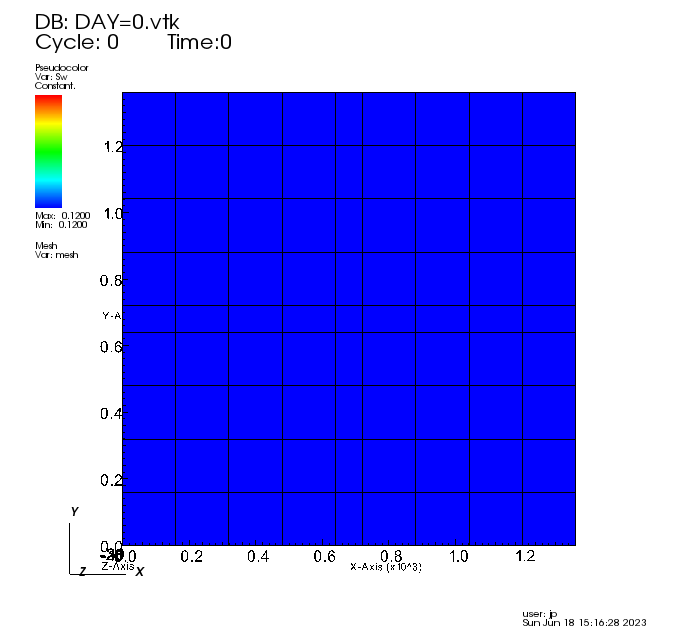

In [22]:
from IPython import display
path = os.path.join(base3_c3_col_path, 'movie_sw.gif')
display.Image(path, width=600)

### Sw Five spot refinado

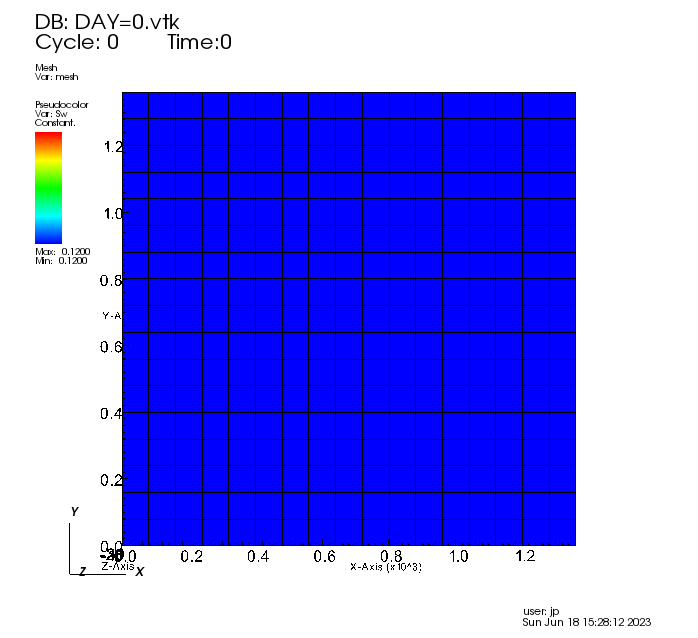

In [23]:
from IPython import display
base18_path = os.path.join(data_cases_path, 'base18')
path = os.path.join(base18_path, 'movie_sw.gif')
display.Image(path, width=600)

#### Campos de pressao e Saturacao com a malha refinada

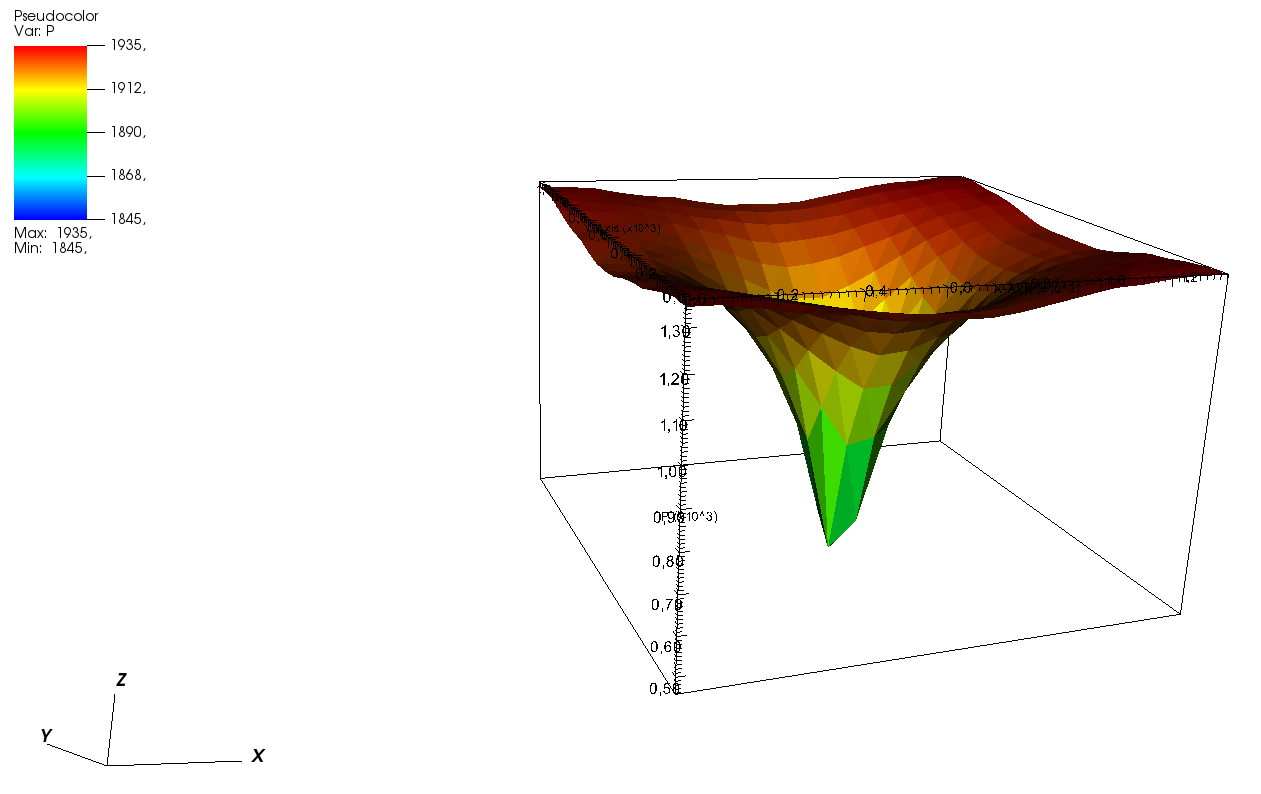

In [33]:
#pressao em 365 dias
from IPython import display
base18_path = os.path.join(data_cases_path, 'base18')
path = os.path.join(base18_path, 'p_3D_D_365.png')
display.Image(path, width=800)

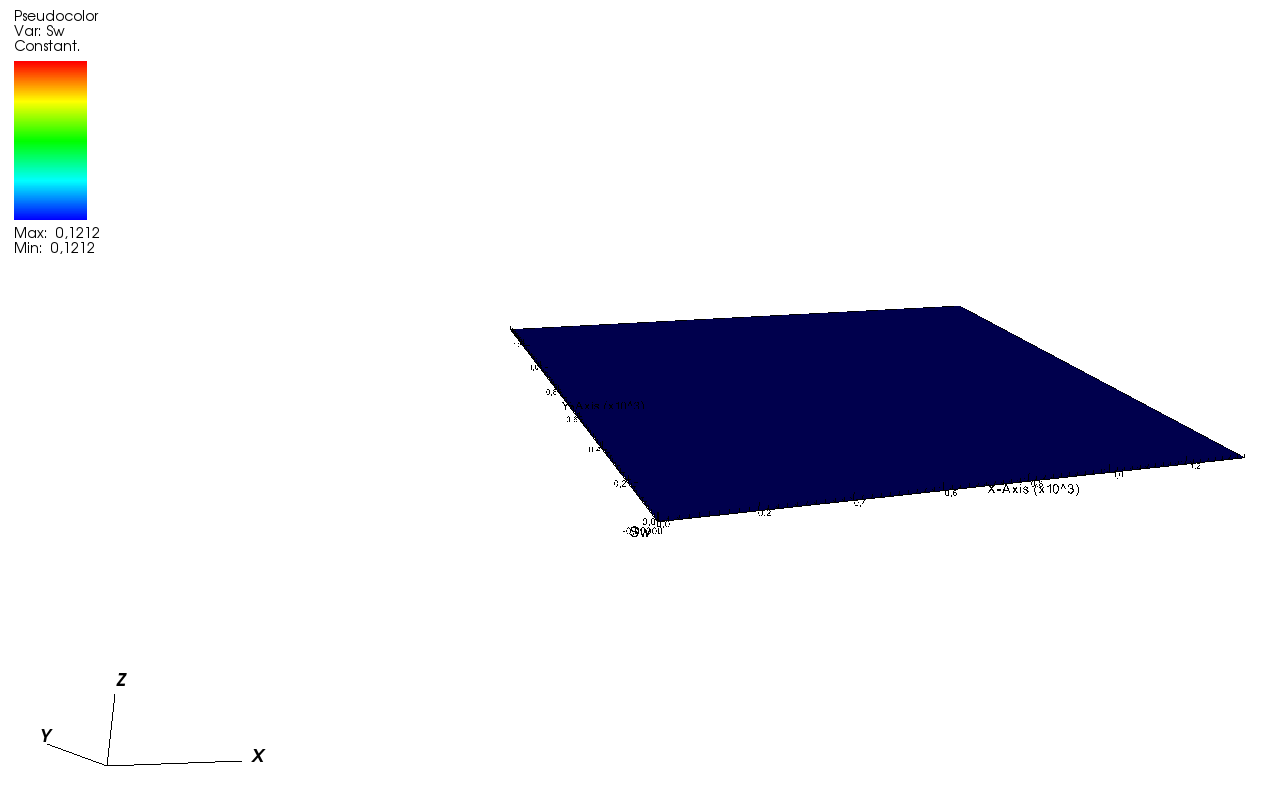

In [35]:
#Saturacao de agua em 365 dias
from IPython import display
base18_path = os.path.join(data_cases_path, 'base18')
path = os.path.join(base18_path, 'Sw_3D_D_365.png')
display.Image(path, width=800)

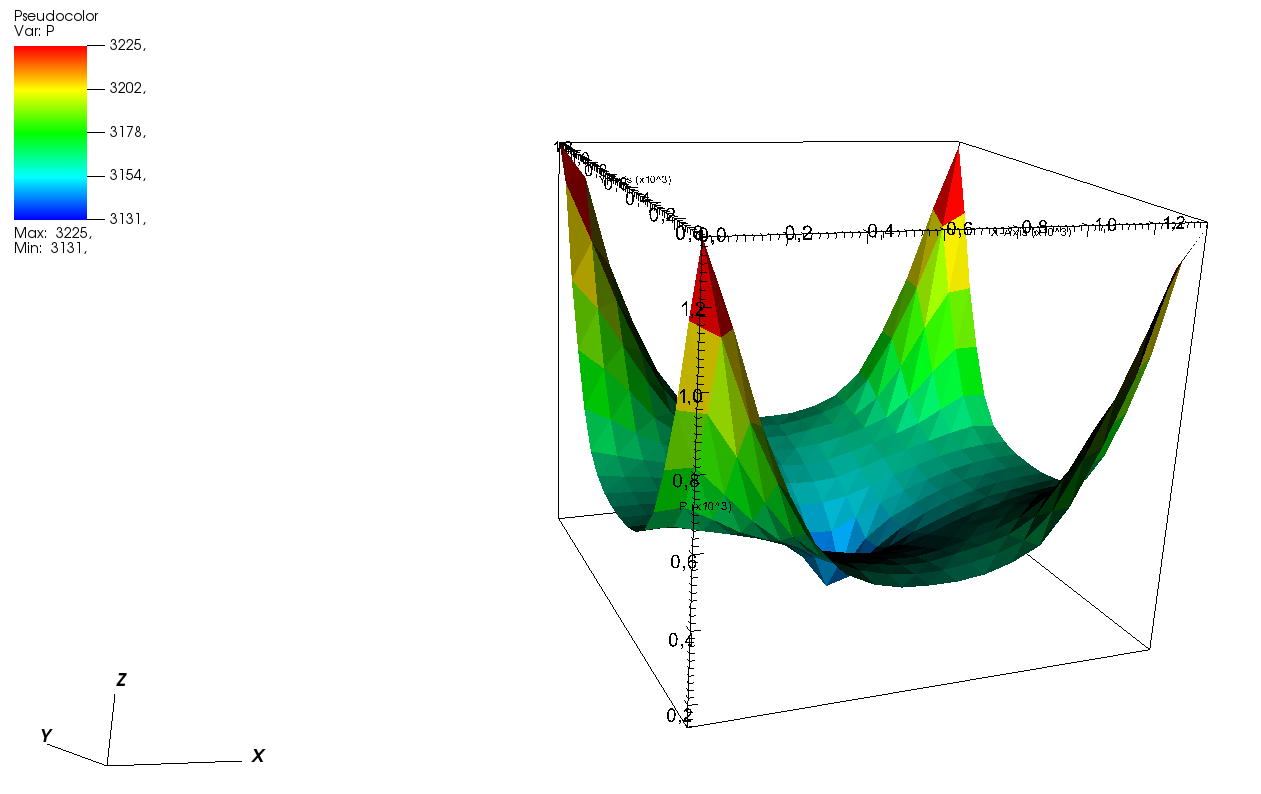

In [36]:
#pressao em 1095 dias
from IPython import display
base18_path = os.path.join(data_cases_path, 'base18')
path = os.path.join(base18_path, 'p_3D_D_1095.png')
display.Image(path, width=800)

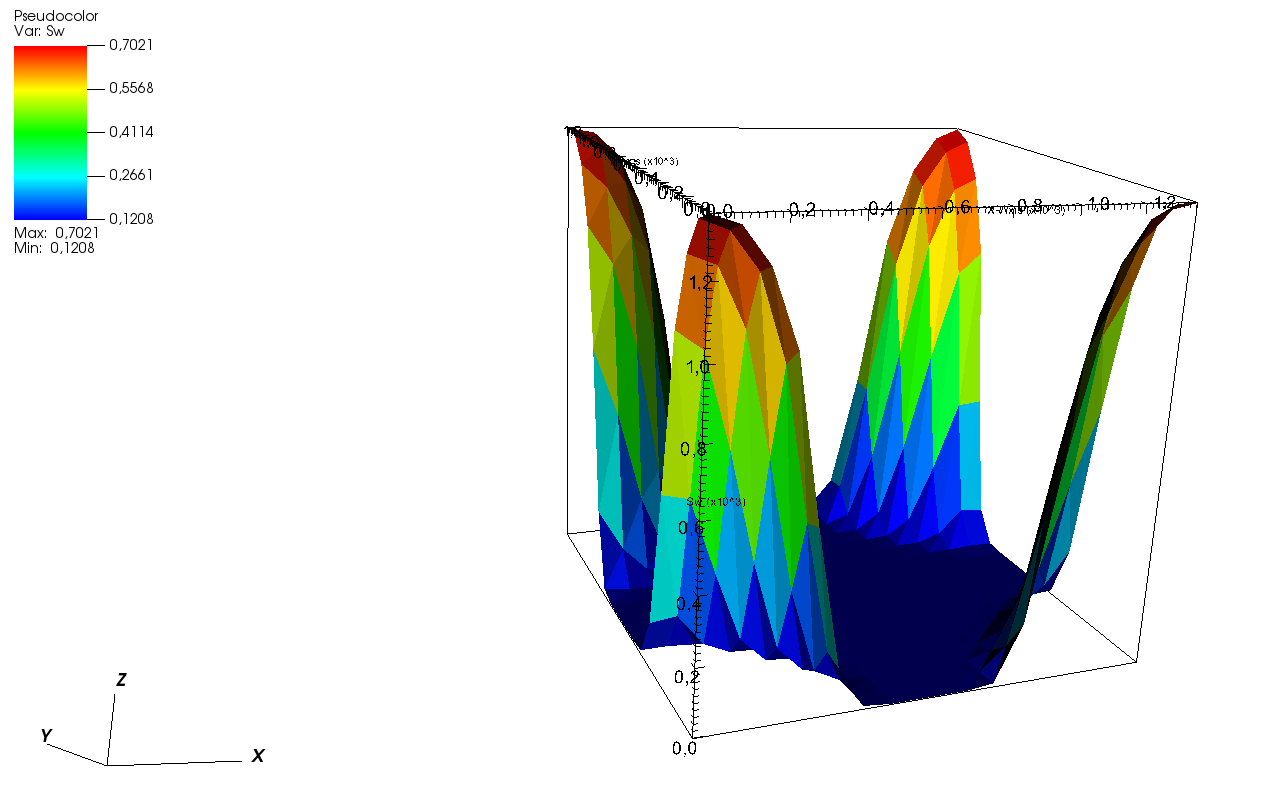

In [37]:
#saturacao de agua em 1095 dias
from IPython import display
base18_path = os.path.join(data_cases_path, 'base18')
path = os.path.join(base18_path, 'Sw_3D_D_1095.png')
display.Image(path, width=800)

### (Refinamento da malha) 1/4 Five Spot

In [25]:
#refinamento da malha de 1/4 de five spot
cases = ['base12', 'base19', 'base20']
legend_dict1 = {
    'base12': '81 blocos',
    'base19': '289 blocos',
    'base20': '289 blocos alt prod'
}

curves1, curves2 = plot_cum_oil(dfs, cases, legend_dict=legend_dict1), plot_wor(dfs, cases, legend_dict=legend_dict1)
curves3 = plot_pavg(dfs, cases, legend_dict=legend_dict1)
curves4 = plot_cum_gas(dfs, cases, legend_dict=legend_dict1)
(curves1 + curves2 + curves3 + curves4).opts(
    shared_axes=False,
    width=100
    ).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Curve.A_81_blocos           :Curve   [x]   (y)
      .Curve.A_289_blocos          :Curve   [x]   (y)
      .Curve.A_289_blocos_alt_prod :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.A_81_blocos           :Curve   [x]   (y)
      .Curve.A_289_blocos          :Curve   [x]   (y)
      .Curve.A_289_blocos_alt_prod :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.A_81_blocos           :Curve   [x]   (y)
      .Curve.A_289_blocos          :Curve   [x]   (y)
      .Curve.A_289_blocos_alt_prod :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.A_81_blocos           :Curve   [x]   (y)
      .Curve.A_289_blocos          :Curve   [x]   (y)
      .Curve.A_289_blocos_alt_prod :Curve   [x]   (y)

### Sw 1/4 Five spot

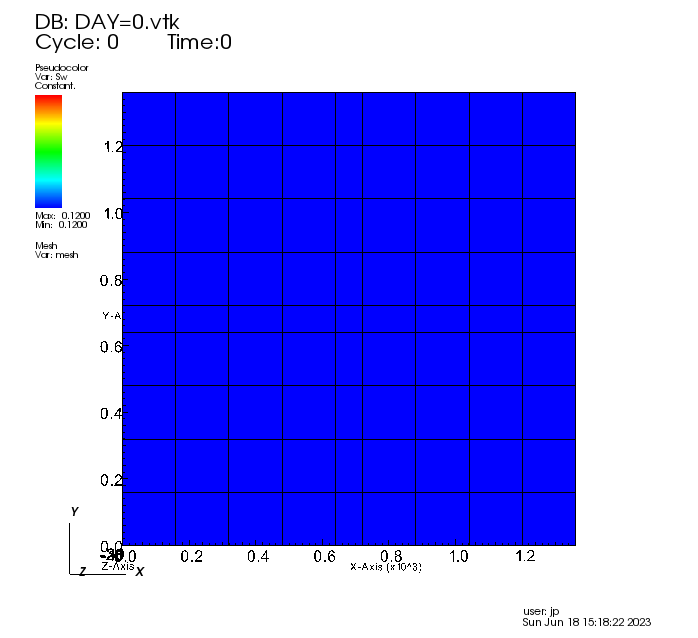

In [26]:
from IPython import display
base12_path = os.path.join(data_cases_path, 'base12')
path = os.path.join(base12_path, 'movie_sw.gif')
display.Image(path, width=600)

### Sw 1/4 Five spot refinado

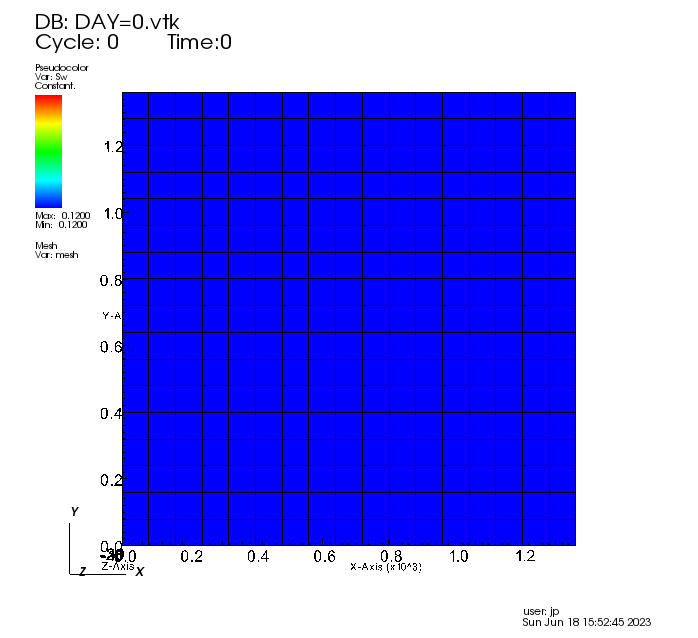

In [27]:
from IPython import display
base20_path = os.path.join(data_cases_path, 'base20')
path = os.path.join(base20_path, 'movie_sw.gif')
display.Image(path, width=600)

### (Campo heterogêneo de permeabilidade) 1/4 de Five spot

In [28]:
# campo heterogeneo
cases = ['base21', 'base22']
legend_dict1 = {
    'base21': 'perm het',
    'base22': 'perm het alt prod'
}
curves1, curves2 = plot_cum_oil(dfs, cases, legend_dict=legend_dict1), plot_wor(dfs, cases, legend_dict=legend_dict1)
curves3 = plot_pavg(dfs, cases, legend_dict=legend_dict1)
curves4 = plot_cum_gas(dfs, cases, legend_dict=legend_dict1)
(curves1 + curves2 + curves3 + curves4).opts(
    shared_axes=False,
    width=100
    ).cols(2)

:Layout
   .Overlay.I   :Overlay
      .Curve.Perm_het          :Curve   [x]   (y)
      .Curve.Perm_het_alt_prod :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.Perm_het          :Curve   [x]   (y)
      .Curve.Perm_het_alt_prod :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.Perm_het          :Curve   [x]   (y)
      .Curve.Perm_het_alt_prod :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.Perm_het          :Curve   [x]   (y)
      .Curve.Perm_het_alt_prod :Curve   [x]   (y)

### Campo de permeabilidade nas direcoes x e y

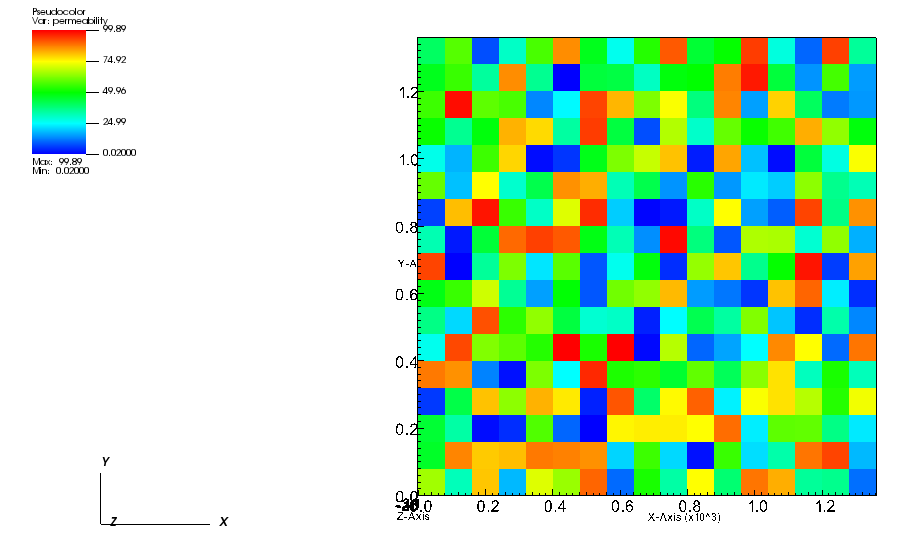

In [29]:
from IPython import display
base22_path = os.path.join(data_cases_path, 'base22')
path = os.path.join(base22_path, 'permeability.png')
display.Image(path, width=1000)

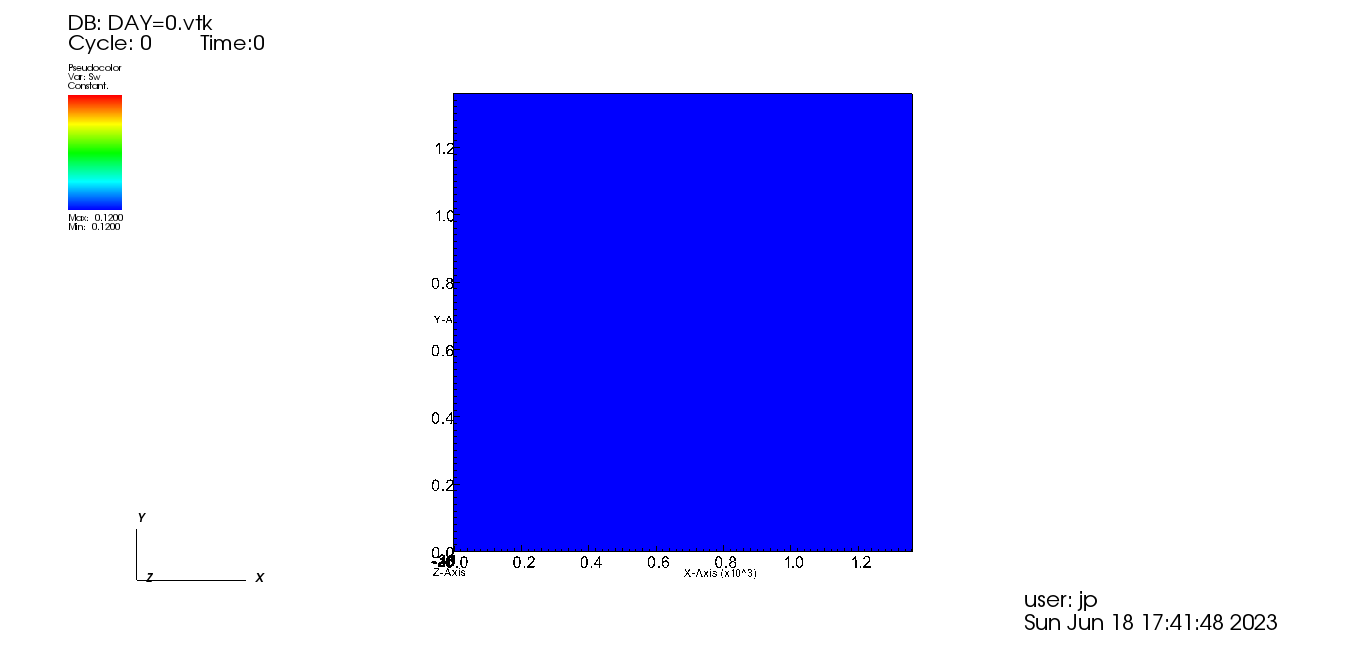

In [30]:
from IPython import display

path = os.path.join(base22_path, 'movie_sw.gif')
display.Image(path, width=800)

oioi
<!-- ### Sw permeabilidade heterogênea -->
<!-- ![perm het gif](data_cases\base22\movie_sw.gif) -->

In [31]:
# from bokeh.io import output_notebook, show
# from bokeh.models.tickers import FixedTicker
# import holoviews as hv
# import numpy as np
# hv.extension('bokeh')
# renderer = hv.renderer('bokeh')

# %opts Curve [xticks=[0, 1.5, 9] show_grid=True]

# points = [(0.1 * i, np.sin(0.1 * i)) for i in range(100)]
# plot = hv.Curve(points)
# p = renderer.get_plot(plot).state
# p.xgrid[0].ticker=FixedTicker(ticks=[1.5, 9])
# p.ygrid[0].ticker=FixedTicker(ticks=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
# show(p)